# LAB SESSION 1 - Bagging and Random Forests

# Utils

In [ ]:
#conda install -c conda-forge scikit-learn, pandas 

In [ ]:
#conda install seaborn

## Ex 1: comparison between CART, bagging and random forests 

We work with the "Urban Land Cover" Machine learning data base (https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover). There are a test and a train set. These data sets are used for automated mapping of urban land cover (trees, grass, soil, concrete, asphalt, buildings, etc.) in satellite or aerial imagery. 9 types of urban land cover are considered and multi-scale spectral, size, shape, and texture information are use for classification. There are a low number of training samples for each class (14-30) and a high number of classification variables (148). The test set is from a random sampling of the image.

Before to start, we: 
 - load the data and look at them (display the dimension and some descriptive statistics) 
 - select the variables that we will use in the exercise, 


In [2]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd # data analysis
ulc_train = pd.read_csv("./machine learning/ULC_training.csv") 
ulc_train.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,21.41,20.40,18.69,2.19,0.48,0.87,6.23,1.60,0.74,-0.08,56,4219.69,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,...,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,6.57,6.97,7.02,1.52,0.45,0.63,6.35,1.55,0.69,-0.10,156,3682.08,3.01,1188,1.45,209.44,2.25,3.54,181.91,222.46,223.95,9.82,10.37,10.51,2.97,0.63,0.65,7.16,1.43,0.83,...,1.66,211.94,2.90,4.97,186.31,223.83,225.68,22.62,22.92,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14,4.57,7711,1.66,211.94,2.90,4.97,186.31,223.83,225.68,22.62,22.92,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,6.16,4.93,5.53,1.14,0.52,0.78,6.19,1.88,0.19,-0.08,144,2943.35,2.32,1095,1.50,232.50,1.93,2.55,208.36,244.07,245.08,6.55,7.01,6.83,2.19,0.49,0.74,6.51,1.61,0.81,...,1.17,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04,1.93,4606,1.17,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,5.76,5.56,5.46,2.51,0.50,0.74,6.28,1.51,0.83,-0.09,218,3550.19,3.16,4009,2.28,231.57,3.48,3.47,204.77,245.17,244.76,9.55,9.35,9.34,2.27,0.63,0.62,7.04,1.32,0.84,...,1.41,226.65,2.06,2.88,200.18,239.93,239.83,13.69,13.75,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38,2.41,10482,1.41,226.65,2.06,2.88,200.18,239.93,239.83,13.69,13.75,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,11.46,8.90,9.77,12.26,0.71,0.59,7.36,0.63,0.99,-0.11,504,2300.41,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,11.46,8.90,9.77,12.26,0.71,0.59,7.36,0.63,0.99,...,2.37,193.39,5.03,12.06,172.13,203.14,204.91,17.38,14.93,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38,3.34,16680,2.37,193.39,5.03,12.06,172.13,203.14,204.91,17.38,14.93,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [ ]:
print(ulc_train.shape)
print(ulc_train.describe())
print(ulc_train['class'].value_counts())

(168, 148)
          BrdIndx         Area  ...  BordLngth_140    GLCM3_140
count  168.000000   168.000000  ...     168.000000   168.000000
mean     2.008512   565.869048  ...     983.309524  1275.292917
std      0.634807   679.852886  ...     880.013745   603.658611
min      1.000000    10.000000  ...      56.000000   336.730000
25%      1.537500   178.000000  ...     320.000000   817.405000
50%      1.920000   315.000000  ...     776.000000  1187.025000
75%      2.375000   667.000000  ...    1412.500000  1588.427500
max      4.190000  3659.000000  ...    6232.000000  3806.360000

[8 rows x 147 columns]
grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: class, dtype: int64


In [ ]:
ulc_test = pd.read_csv("/content/drive/MyDrive/ubs/machine learning/ULC_testing.csv") 
ulc_test.head()
print(ulc_test.shape)

(507, 148)


In [ ]:
# (2) Select the variables that we be used 
target_column = "class" # The response variable that we will consider
features_columns = list(ulc_train)
features_columns.remove('class') # The predictors/features used to predict the target
#print(target_column)
#print(features_columns)

In [ ]:
data, target = ulc_train[features_columns], ulc_train[target_column]        #dividing data to training set
data_test, target_test = ulc_test[features_columns], ulc_test[target_column]    #ddividing data to testing set


**Question 1. Fit a random forest on the training set to explain the type of soil (variable class) according to multi-scale spectral, size, shape, and texture information. You will use the values for $n\_estimators= 500 $ and $ max\_features= \sqrt(d)$ with $d$ denoting the number of features, $oob\_score=True$  and $random\_state=0$. Remind the meaning of $n\_estimators $ and $ max\_features$. Compute the oob score and explain. What does it represent ?**


In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##
## Help: 
## - import RandomForestClassifier from sklearn.ensemble
## - see the documentation about random forest classifier with scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#max_feature are the number of feature we wanna cut in each node also randomstate will control bootstrap and feature sampling


# Step 1: create the object rfc, it is a RandomForestClassifier object with n_estimators=500, max_features='auto' and random_state=0
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)#, max_features=)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
rfc.fit(data,target)

# Step 3: look at the parameters used by your forest
from pprint import pprint
print('Parameters of the forest:\n')
pprint(rfc.get_params())
print('\n')

# Step 4: print the oob_score (attributes of rfc named oob_score_)
print('oob score: ',rfc.oob_score_)
#.....


Parameters of the forest:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


oob score:  0.8452380952380952


**Question 2. Predict the class of each observation of the test sample by using the random forest $\mathtt{rfc}$ and display the confusion matrix. Comment it. How many observations are misclassified ? Compute the accuracy.**

1.0


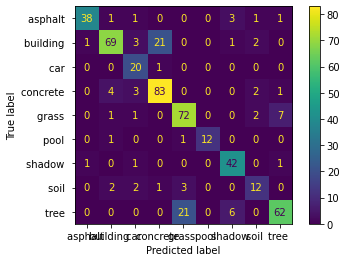

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: compute the predictions
predictions_test = rfc.predict(data_test) 
#print(predictions_test)

# Step 2: display the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test,predictions_test) # define the confusion matrix object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_) # display the confusion matrix
disp.plot() 

# Step 3: compute the accuracy
accuracy = rfc.score(data_test,predictions_test)
print(accuracy) 

#we see that oob error is much more optimistic than the computational confusion matrix due to computation of avageraing of trees


We will now focus on the calibration of some RF parameters: $n\_estimators$ and $max\_features$. To calibrate these parameters, we will used the OOB errors.

**Question 3.  The code below shows how the OOB error can be measured at the addition of each new tree during training. The resulting plot can be used to approximate a suitable value of $n\_estimators$ at which the OOB error stabilizes. Comment this plot. What value for $n\_estimators$ does it seem suitable ?**

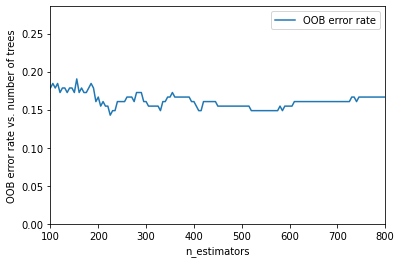

In [ ]:
import matplotlib.pyplot as plt

RANDOM_STATE = 0


# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = []

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 800
step=5

for i in range(min_estimators, max_estimators+1, step):
    rfc = RandomForestClassifier(warm_start=True, n_estimators=i, max_features='auto',random_state=RANDOM_STATE, oob_score=True)
    rfc.fit(data, target)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - rfc.oob_score_
    error_rate.append(oob_error)
  

# Plot Generate the "OOB error rate" vs. "n_estimators" plot

plt.plot(range(min_estimators, max_estimators +1, step), error_rate, label="OOB error rate")

plt.ylim(0, 1.5*max(error_rate)) 
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate vs. number of trees")
plt.legend(loc="upper right")
plt.show()


In [ ]:
##----- You can write your answer here or on a paper as well-----##

Though the oob_error is less for higher number of trees that suggest better accuaracy. Still I will sugguest to take a value in such a way that the model is stabilized, so here I choose to take 600 values for n_estimator. Also, taking into consideration larger the value for n_estimator more complex will be the tree.

**Question 4. Now, we will repeat 10 times a 3-fold cross validation with the function GridSearchCV to calibrate at the same time the parameters $n\_estimators$ and $max\_features$. Then Comment the result and next build a forest using the best values for the parameters $n\_estimators$ and $max\_features$. Compute the accuracy on the test set and display the confusion matrix. Compare the performance of this forest with the previous one.**

In [ ]:
# Step 1: create a grid with all the values that we will considers for the two paramters
grid = {
    'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], #it mean each time i take 10% of my feature
    'n_estimators':[200,400,600,800]
}

# Step 2: use the grid to to search for the best couple of parameters
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier() # create the forest model to tune

B=10
results_cv=pd.DataFrame()
for i in range(B):
    rf_cv = GridSearchCV(estimator=rf,param_grid=grid, cv=3,n_jobs=-1)# Search the best values for the parameters using 3-fold cross validation, and use all available cores(n_jobs=-1)
    rf_cv.fit(data, target) # Fit the CV search
    if i==0: 
        results_cv=pd.DataFrame(rf_cv.cv_results_)[["params","mean_test_score","std_test_score"]]
    else:
        results_cv["mean_test_score"]=results_cv["mean_test_score"]+pd.DataFrame(rf_cv.cv_results_)["mean_test_score"]
        results_cv["std_test_score"]=results_cv["std_test_score"]+pd.DataFrame(rf_cv.cv_results_)["std_test_score"]  
        
        

results_cv["mean_test_score"]=results_cv["mean_test_score"]/B
results_cv["std_test_score"]=results_cv["std_test_score"]/B 


# Step 3: get the best parameters (with the higher performance)
ind_best=results_cv["mean_test_score"].idxmax() #keep score that gives the best accuracy 
print(results_cv["params"].iloc[ind_best])
print(results_cv["mean_test_score"].iloc[ind_best])
print(results_cv["std_test_score"].iloc[ind_best])


{'max_features': 0.1, 'n_estimators': 200}
0.8357142857142857
0.04313101424651139


**Question 5. Build a forest using the best values for the parameters $n\_estimators$ and $max\_features$. Compute the accuracy on the test set and display the confusion matrix. Compare the performance of this forest with the previous one.**

0.8126232741617357


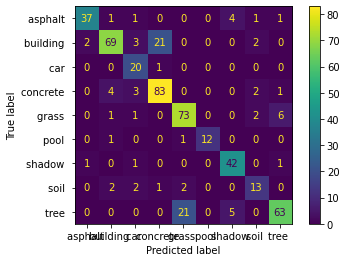

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: fit a random forest with the best values for parameters
best_rfc = RandomForestClassifier(n_estimators=600, max_features=0.1,oob_score=True,random_state=0)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
best_rfc.fit(data,target)

# Step 3: compute the accuracy and the confusion matrix
predictions_test_2 = best_rfc.predict(data_test) 
cm_2 = confusion_matrix(target_test,predictions_test_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=best_rfc.classes_)
disp.plot() 

# Step 4: compute the accuracy
accuracy_2 = best_rfc.score(data_test,target_test)
print(accuracy_2)

**Question 6. what value for $max\_features$ we have to use if we want to apply the bagging algorithm ? Build this model and compute the prediction error of this model based on the test set. Compare this model with the two previous random forests. We will call this model $bag$.**

In [ ]:
##----- You can write your answer here or on a paper as well-----##

0.8273809523809523


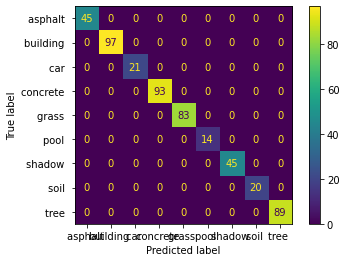

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: fit a a bagging model (use the best value for n_estimators)
bag = RandomForestClassifier(n_estimators=600, max_features=0.1,oob_score=True,random_state=0)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
bag.fit(data_test, target_test)

# Step 3: compute the accuracy and the confusion matrix
predictions_test_bag = bag.predict(data_test) 
cm_bag = confusion_matrix(target_test,predictions_test_bag)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bag,display_labels=bag.classes_)
disp.plot() 

# Step 4: compute the accuracy
accuracy_bag = bag.score(data,target)
print(accuracy_bag)



**Question 7. Fit a maximal CART tree on the training set. Compute the prediction error of this tree based on the test set. name this tree $single\_tree$.**

*Indication: to get the maximal tree, use max_depth=None (the default value).*

0.717948717948718


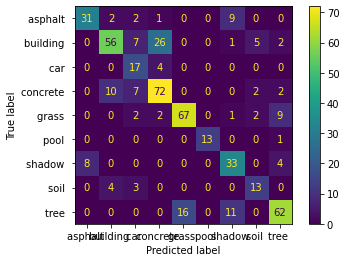

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##
## Help: see TP1

# Step 1: Fit the maximum tree with random_state=0
from sklearn.tree import DecisionTreeClassifier, plot_tree
single_tree = DecisionTreeClassifier(random_state=0)

# Step 2: build the tree on the train set by indicating the input data and the traget variable 
single_tree.fit(data,target)

# Step 3: compute the accuracy and the confusion matrix
predictions_test_tree = single_tree.predict(data_test)
cm_tree = confusion_matrix(target_test,predictions_test_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=single_tree.classes_)
disp.plot() 

# ste 4: compute the accuracy on the test set
accuracy_tree = single_tree.score(data_test,target_test)
print(accuracy_tree)


In [ ]:
## Solution
print("node count: ",single_tree.tree_.node_count);
print("children in the left:\n ",single_tree.tree_.children_left)
print("children in the right: \n",single_tree.tree_.children_right)
print("tree impurity:\n ",single_tree.tree_.impurity)
print("tree threshold: \n",single_tree.tree_.threshold)
# Avoir toutes la meilleure coupure pour chaque variable possible ?

node count:  35
children in the left:
  [ 1  2 -1  4  5 -1  7 -1 -1 10 11 12 -1 -1 15 16 17 -1 -1 -1 21 -1 -1 -1
 25 26 -1 -1 29 30 -1 32 -1 -1 -1]
children in the right: 
 [24  3 -1  9  6 -1  8 -1 -1 23 14 13 -1 -1 20 19 18 -1 -1 -1 22 -1 -1 -1
 28 27 -1 -1 34 31 -1 33 -1 -1 -1]
tree impurity:
  [0.8801729  0.84536862 0.         0.818      0.48611111 0.
 0.16528926 0.         0.         0.73614958 0.6509003  0.1472
 0.         0.         0.54475309 0.24380165 0.44444444 0.
 0.         0.         0.24489796 0.         0.         0.
 0.59522962 0.42       0.         0.         0.22038567 0.1207076
 0.         0.44444444 0.         0.         0.        ]
tree threshold: 
 [ 5.49999997e-02 -1.90000005e-01 -2.00000000e+00  9.85349998e+01
 -9.50000025e-02 -2.00000000e+00  4.45000008e-01 -2.00000000e+00
 -2.00000000e+00  1.18800001e+01  2.02999997e+00  1.16800000e+03
 -2.00000000e+00 -2.00000000e+00 -6.49999995e-02  3.94999996e-01
  1.42000002e+00 -2.00000000e+00 -2.00000000e+00 -2.00000000e

**Question 8. Make a comparison between the bagging model $bag$, the single and maximal tree $single\_tree$ and the optimized random forest $best\_rfc$. What model do you choose and why ?**

In [ ]:
##----- You can write your answer here or on a paper as well-----##
print('overall accuracy of single tree model is: ',accuracy_tree)
print('overall accuracy of bag model is: ',accuracy_bag)
print('overall accuracy of random forest model is: ',accuracy_2)

overall accuracy of single tree model is:  0.717948717948718
overall accuracy of bag model is:  0.8273809523809523
overall accuracy of random forest model is:  0.8126232741617357


The code below show the permutation feature importance computed on the test set. The permutation feature importance score is independently computed $n\_repeats$ times (using each time another permutation of each feature). The final feature importance score corresponds to the mean over the $n\_repeats$ computations.

**Question 9. Comment the plot. What does it represent ?**

In [ ]:
## Solution

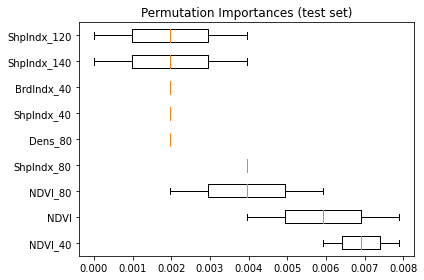

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_rfc, data_test, target_test, n_repeats=2, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()
invert_sorted_idx=sorted_idx[::-1][:9]

fig, ax = plt.subplots()
ax.boxplot(result.importances[invert_sorted_idx].T,
           vert=False, labels=data_test.columns[invert_sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
##----- Write your answer here -----##

## Ex 2: introduction to regression trees

Here, we consider the dataset named *srbct_data*. It is relative to small round blue cell tumors of childhood. This set is composed of :

- a response factor of length 63, called class, indicating the class of each sample (4 classes in total).
- 2308 predictors. Each predictor represents the expression of one gene. The features are correlated. 

More information about the data are available on https://www.rdocumentation.org/packages/plsgenomics/versions/1.5-2/topics/SRBCT 

The table named *genes_name* contains the names of the genes and a description for each gene.

In [4]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd # data analysis
srbct_data = pd.read_csv("./machine learning/cancer_data.csv")
genes_name = pd.read_csv("./machine learning/cancer_data_genes_names.csv")
srbct_data.head()

,class,21652,25725,26184,22260,22293,22493,23019,23132,24145,25584,31143,31169,27549,27624,27848,28410,29054,34945,35483,32875,32898,33525,33632,34357,34355,34396,36950,39285,39796,37196,37904,38471,39093,39993,42352,42576,40026,40304,40360,...,343990,290753,115408,323577.1,323371.1,782439,269354.1,502421,291974,376802,1048810,259462,810059.1,771172,809758,810861,810411,795832,810843,191743,811095,811028,810989,770935,782335,366848,810133,795582,809719,33616,809513,504207,810448,810402,782503,795277,809383,809815,810483,503033
0,EWS,3.2025,0.0681,1.0460,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,2.9001,4.0270,1.0643,4.0651,1.4730,2.7932,0.4815,1.4482,3.3214,0.7022,1.7260,1.5136,3.9255,0.5296,3.9098,3.7136,4.0016,1.1819,2.1459,0.6662,1.7203,0.2690,1.4677,0.6380,2.1497,3.7382,2.7538,0.8587,0.9320,1.0597,...,0.1258,1.6173,0.4661,0.7599,0.2745,0.9985,0.1059,0.5853,3.8000,0.1275,0.5428,0.9514,1.8408,0.2024,0.6766,0.5689,0.5604,0.4027,1.0055,0.4548,0.2620,0.3451,0.7974,0.8585,0.4701,0.2156,0.3792,0.4419,0.2128,0.7948,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.7240,0.2044
1,EWS,1.6547,0.0710,1.0409,0.0520,0.2045,2.1609,2.4452,1.1473,0.7371,1.9989,2.6131,0.8541,4.7284,2.4784,1.5103,0.8961,0.4850,2.3431,0.2531,1.7841,1.0886,5.9544,0.5337,2.7007,3.2339,3.4448,2.8296,0.9659,0.4829,1.3528,0.7262,1.2882,2.5171,3.0538,2.8671,1.9144,0.5963,0.9130,0.5030,...,0.1938,1.0460,0.3609,0.5791,1.1683,1.2184,0.1118,0.6409,1.8589,0.1370,0.6127,0.5862,1.3508,0.5225,0.7216,0.6697,0.4791,0.2255,0.6509,0.2902,0.2171,1.6517,1.4018,1.9379,0.3307,0.1734,2.2825,0.3584,0.4693,1.4629,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.4140,1.2708,0.2990
2,EWS,3.2779,0.1160,0.8926,0.1014,0.2818,1.9773,3.2590,1.4106,0.9548,2.0775,4.8139,0.4257,4.7120,2.7548,1.9162,1.2710,1.1331,2.4818,2.0350,1.7340,2.6863,5.5842,1.1332,4.6055,2.2437,3.8154,1.6393,1.9209,0.7984,1.5175,0.5605,1.5492,1.8893,2.0080,4.8112,2.2913,0.2019,1.2415,0.6952,...,0.2517,1.5805,0.4393,0.9812,0.1889,0.2487,0.1411,0.4914,2.7463,0.1947,0.3494,0.6460,2.2891,0.4394,0.8380,0.9131,0.8453,0.4718,0.3814,0.3783,0.3050,5.0694,1.1673,2.1713,0.6075,0.2832,0.6821,0.3776,0.6744,1.7190,1.2674,1.5152,0.2382,0.8720,0.6819,0.3221,0.2156,0.3227,1.2142,0.2230
3,EWS,1.0060,0.1906,0.4302,0.1035,0.2984,1.6804,5.8901,0.2958,0.7381,1.6610,4.9105,1.5866,9.4802,0.1667,1.1314,2.6361,0.8405,0.9928,0.1239,0.5216,0.9867,4.8170,0.6451,2.0627,3.1900,3.4317,0.1925,0.9634,0.3900,0.3349,0.3040,0.3668,1.7941,2.7727,1.3236,0.8575,1.5864,0.4192,0.6228,...,0.2222,0.0831,0.1247,0.3872,0.0650,0.9711,0.0930,0.6209,3.8167,0.1972,1.1626,0.5633,0.2191,0.4336,1.2013,0.1385,0.3507,0.2304,0.5563,0.1045,0.4819,6.0368,0.7366,1.1104,0.1976,0.3501,0.0790,0.5446,1.2495,0.1422,0.4743,1.0282,0.1049,0.5632,1.2264,0.8123,0.2758,0.3016,0.7235,0.0871
4,EWS,2.7098,0.2367,0.3693,0.2190,0.3711,1.7800,3.2376,0.6769,0.8546,0.6808,4.5104,0.6461,3.6433,1.7957,1.0375,0.3976,0.8846,1.5156,1.2582,1.0114,1.5428,5.1313,0.6248,4.4183,2.1173,5.5302,1.8151,0.7825,0.4637,0.7564,0.6539,0.9060,0.9905,2.6055,0.9257,1.5953,0.4982,0.8406,0.6296,...,0.0775,0.7065,0.2509,0.5257,0.8960,0.4636,0.1119,0.2938,1.2584,0.0957,0.2059,1.5336,0.5709,0.1684,0.5880,0.6647,1.0810,0.6542,1.2152,0.5564,0.1663,5.4848,0.3547,2.7707,0.6221,0.4338,0.4045,0.5979,0.2370,0.8404,0.7039,0.5961,0.0707,0.4001,1.5271,0.4084,0.6412,0.3552,1.3928,0.2157


In [5]:
genes_name.head()

,Image.Id.,Gene.Description
0,21652.0,"catenin (cadherin-associated protein), alpha 1..."
1,25725.0,farnesyl-diphosphate farnesyltransferase 1
2,26184.0,"phosphofructokinase, platelet"
3,22260.0,cytochrome c-1
4,22293.0,uroporphyrinogen III synthase (congenital eryt...


In [6]:
# (2) Select the variables that we be used 
target_name = "class" # The response variable that we will consider
features_names = list(srbct_data)
features_names.remove('class') # The predictors/features used to predict the target
#print(target_column)
#print(features_columns)

In [7]:
# (3) Split the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X, y = srbct_data[features_names], srbct_data[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.25)

In [10]:
# Data Type understanding 

print("Different classes available:", srbct_data['class'].unique())
print("length of features:", len(list(srbct_data.columns)))

Different classes available: ['EWS' 'BL' 'NB' 'RMS']
length of features: 2309


**Questions:**
 - 1) Build a random forest on this dataset using the default values for the RF parameters and all the features.
 - 2) Calibrate the two parameters ($n\_estimators$ and $max\_features$) using an approach based on either the oob error or cross validation.
 - 3) Build a second random forest using the calibrated values for the two parameters.
 - 4) Because there are lots of features and they are correlated, use the variable importance score to select a small subset of variables. Justify your choice.
 - 5) Build a third random forest based only the selected subset of features.
 - 6) Compare all these models with a logistic regression.

**Building a random forest on given dataset using the default values for the RF parameters and all the features.**

Accuracy with default setting is: 0.9375


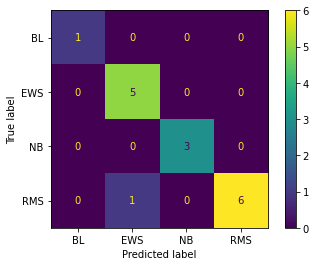

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#creating a RF model
default_rf = RandomForestClassifier(n_jobs=-1)

#fitting the model on train dataset
default_rf.fit(X_train,y_train)

#computing the prediction and confusion matrix
prediction_default = default_rf.predict(X_test)
cm_defaultRF = confusion_matrix(prediction_default,y_test)
displayCM = ConfusionMatrixDisplay(confusion_matrix=cm_defaultRF, display_labels=default_rf.classes_)
displayCM.plot()

#computing accuracy
accuracy_defaultRF=default_rf.score(X_test,y_test)
print("Accuracy with default setting is:", accuracy_defaultRF)

For question 1, classifical random forest model classifier model was created with default settings as defined by Sklearn. The accuracy score was 93.75% for the given set of data. 

**Calibrating the two parameters ( n_estimators  and  max_features ) using an approach based on either the oob error or cross validation.**

In [14]:
# Step 1: create a grid with all the values that we will considers for the two paramters
params={
    'max_features':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'n_estimators':[200,400,500,600]
}
# Step 2: use the grid to to search for the best couple of parameters
from sklearn.model_selection import GridSearchCV
tune_rf=RandomForestClassifier()

B=6
results_cv_rf=pd.DataFrame()
for i in range(B):
  rf_cv=GridSearchCV(estimator=tune_rf,param_grid=params,cv=3, n_jobs=-1)
  rf_cv.fit(X_train, y_train) # Fit the CV search
  if i==0: 
    results_cv_rf=pd.DataFrame(rf_cv.cv_results_)[["params","mean_test_score","std_test_score"]]
  else:
    results_cv_rf["mean_test_score"]=results_cv_rf["mean_test_score"]+pd.DataFrame(rf_cv.cv_results_)["mean_test_score"]
    results_cv_rf["std_test_score"]=results_cv_rf["std_test_score"]+pd.DataFrame(rf_cv.cv_results_)["std_test_score"]  
  print("Progress: ",i+1,"of",B)
        
        

results_cv_rf["mean_test_score"]=results_cv_rf["mean_test_score"]/B
results_cv_rf["std_test_score"]=results_cv_rf["std_test_score"]/B 


# Step 3: get the best parameters (with the higher performance)
ind_best=results_cv_rf["mean_test_score"].idxmax()
print("Best params: ",results_cv_rf["params"].iloc[ind_best])
print("Mean test score: ",results_cv_rf["mean_test_score"].iloc[ind_best])
print("Stdev. test score: ",results_cv_rf["std_test_score"].iloc[ind_best])

Progress:  1 of 6
Progress:  2 of 6
Progress:  3 of 6
Progress:  4 of 6
Progress:  5 of 6
Progress:  6 of 6
Best params:  {'max_features': 0.9, 'n_estimators': 200}
Mean test score:  0.9895833333333334
Stdev. test score:  0.014731391274719738


GridSearchCV library was used in Q2 to loop through a list of parameters for n_estimator as number of trees and max_features representing the maximum number of features that a indivial tree can take. As a result, with 0.9 features and 200 trees were evaluated as the best hyperparameter to be used. 

**Build a second random forest using the calibrated values for the two parameters.**

Accuracy Opt.:  1.0


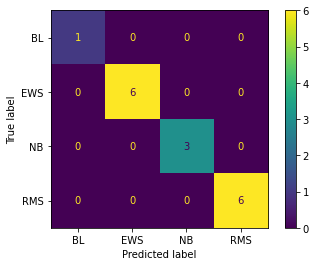

In [18]:
# Step 1: create RF object
rf_calib = RandomForestClassifier(n_jobs=-1, max_features=0.9, n_estimators=200)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
rf_calib.fit(X_train, y_train)

# Step 3: compute the accuracy and the confusion matrix
predictions_rf_calib = rf_calib.predict(X_test) 
cm_rf_calib = confusion_matrix(predictions_rf_calib,y_test)
disp_cm_rf_calib = ConfusionMatrixDisplay(confusion_matrix=cm_rf_calib,display_labels=rf_calib.classes_)
disp_cm_rf_calib.plot() 

# Step 4: compute the accuracy
accuracy_rf_calib = rf_calib.score(X_test,y_test)
print("Accuracy Opt.: ",accuracy_rf_calib)

When applying the hyperparamter values obtained from Q2, accuracy of 100% was achived in Q3.

**Because there are lots of features and they are correlated, use the variable importance score to select a small subset of variables. Justify your choice.**

In [20]:
from sklearn.inspection import permutation_importance
result_rf = permutation_importance(rf_calib, X_test, y_test, n_repeats=6, random_state=42, n_jobs=-1)
sorted_idx = result_rf.importances_mean.argsort()
invert_sorted_idx=sorted_idx[::-1][:9]

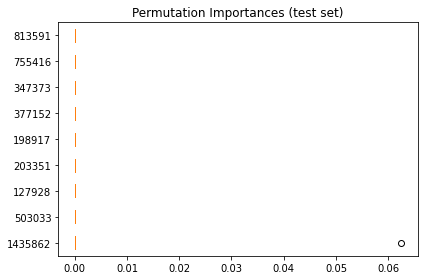

In [32]:
fig, ax = plt.subplots()
ax.boxplot(result_rf.importances[invert_sorted_idx].T,
           vert=False, labels=X_test.columns[invert_sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [41]:
rf_calib.feature_importances_

array([0.        , 0.00209877, 0.        , ..., 0.        , 0.        ,
       0.        ])

Permutation_importance was identified as a reliable technique for model inspection for any fitted estimator. But in the box plot,we were not able to interpret the result, first reason could be due to very less importance of each feature as show in the line above another I assume is due to large number of numebrs taken.
So to ensure that these feature holds some importance, further a bar graph with finer details is plotted as shown in the graph below. It shows that the importance index is very low as they are distributed among large group.

<Figure size 864x720 with 0 Axes>

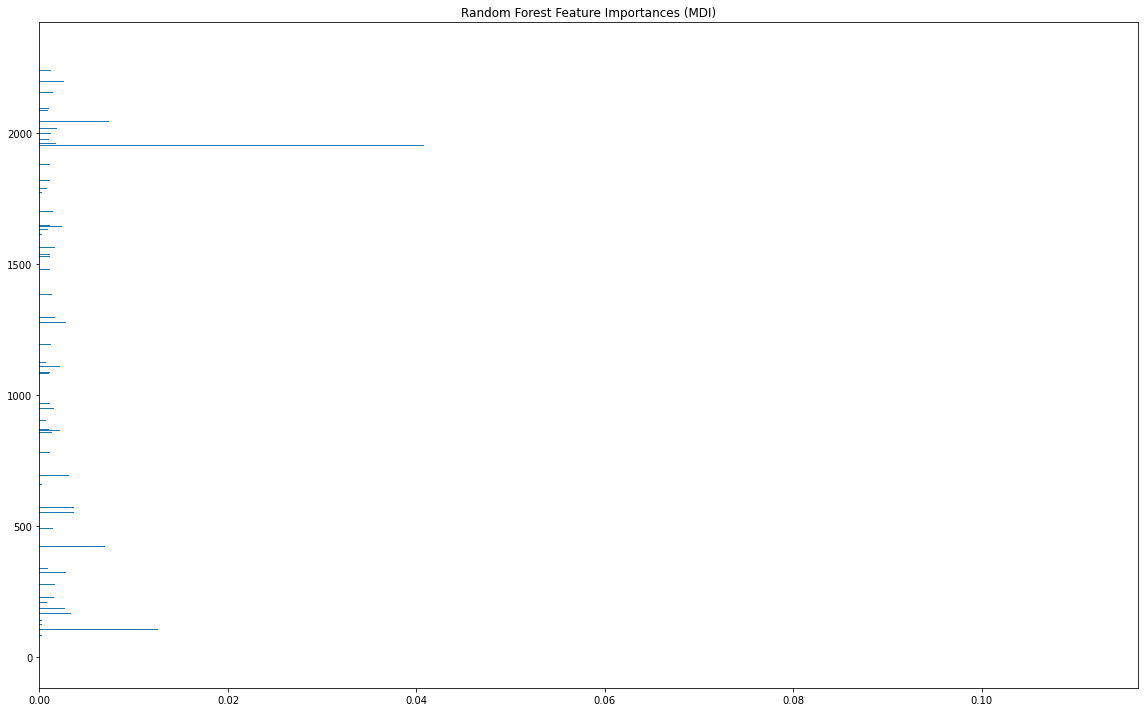

In [42]:
y_ticks = np.arange(0, len(features_names))
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(16,10))
ax.barh(y_ticks, rf_calib.feature_importances_)
#ax.set_yticks(y_ticks)
#ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

In [45]:
print("Max importance: ",result_rf.importances.max())
print("Min importance: ",result_rf.importances.min())
print("Mean importance: ",result_rf.importances.mean())

Max importance:  0.0625
Min importance:  0.0
Mean importance:  4.513287117273252e-06


**Building a third random forest based only the selected subset of features.**

In [46]:
# BUILD SMALLER DATASET
target_name = "class" # The response variable that we will consider
features_names = X_test.columns[invert_sorted_idx] # extract features from index via columns

X_subset, y_subset = srbct_data[features_names], srbct_data[target_name]
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, random_state=42,test_size=0.25)

Accuracy Opt. with Subset:  0.75


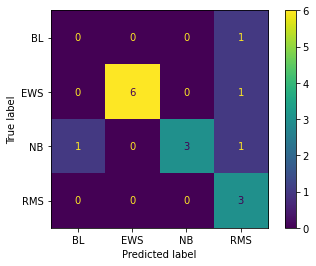

In [47]:
# Step 1: create RF object
rf_subset = RandomForestClassifier(n_jobs=-1, max_features=0.4, n_estimators=200)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
rf_subset.fit(X_train_subset, y_train_subset)

# Step 3: compute the accuracy and the confusion matrix
predictions_subset = rf_subset.predict(X_test_subset) 
cm_subset = confusion_matrix(predictions_subset,y_test_subset)
disp_subset = ConfusionMatrixDisplay(confusion_matrix=cm_subset,display_labels=rf_subset.classes_)
disp_subset.plot() 

# Step 4: compute the accuracy
accuracy_subset = rf_subset.score(X_test_subset,y_test_subset)
print("Accuracy Opt. with Subset: ",accuracy_subset)

Further in Q5, based on selected subset with different level of importance, a new random forest model was generated.This model ensured an accuracy of 75%.

**Comparing all these models with a logistic regression.**

In [51]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0,max_iter=600)
clf_lr.fit(X_train, y_train)
lr_pred = clf_lr.predict(X_test)
accuracy_lr_pred = clf_lr.score(X_test,y_test)
accuracy_lr_pred

0.9375

Finally, to compare the performance of Random Forest with different setting to the performace of Logistic Regression, a Logistic Regression model with 600 iteration was generated. The accuracy of this model was similar to that of default Random Forest model.

In [49]:
#overall accuracy for different models
print("Accuracy Default RF: ",accuracy_defaultRF)
print("Accuracy Optimal Parameter RF: ",accuracy_rf_calib)
print("Accuracy Optimal RF with 9 best features: ",accuracy_subset)
print("Accuracy Logistic Regression: ",accuracy_lr_pred)

Accuracy Default RF:  0.9375
Accuracy Optimal Parameter RF:  1.0
Accuracy Optimal RF with 9 best features:  0.75
Accuracy Logistic Regression:  0.9375


Hence, highest accuracy for the given set of data was obtained by Random Forest model that used the optimal parameters evaluated by GridSearchCV library of Sklearn.